In [4]:
from session.PPOsession import PPOSession
from agent.train_and_test.train_test_callback import TrainTestCallback
N_eps = 7000
best_ppo_hp = {'learning_rate': 0.0007945280477054489, 'gamma': 0.993, 'clip_range': 0.27, 'n_steps': 2048, 'batch_size': 64}


In [5]:
s1 = PPOSession('CustomHopper-source-v0', 'ppo-source')
s1.load_agent(**best_ppo_hp)
s1.load_callback(TrainTestCallback, test_env_path='CustomHopper-target-v0', test_every=10, max_episode = N_eps)
s1.train(500*N_eps)

 7000 episodes completed.

In [6]:
s2 = PPOSession('CustomHopper-target-v0', 'ppo-target')
s2.load_agent(**best_ppo_hp)
s2.load_callback(TrainTestCallback, max_episode = N_eps)
s2.train(500*N_eps)

 7000 episodes completed.

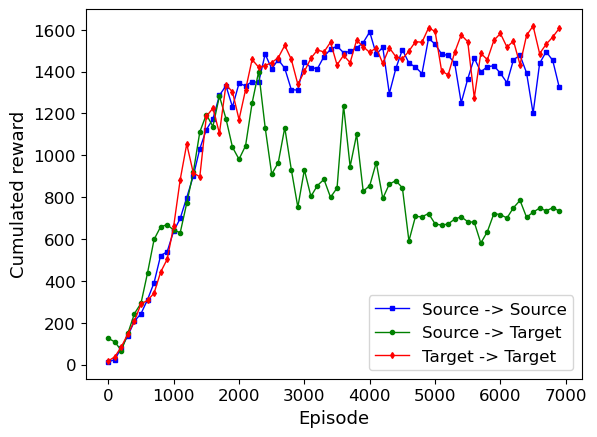

In [16]:
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
import json
n_avg = 100

fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-source/step_2_train/"
with open(dir + 'train_rewards.json') as f:
    rd_rewards = json.load(f)
averaged_rewards = rolling_avg(rd_rewards, n_avg)
test_every = 10
n_test_avg = 10
with open(dir + 'test_rewards.json') as f:
    ref_rewards = json.load(f)
ref_rewards = rolling_avg(ref_rewards, n_test_avg)
train_eps = range(0, len(rd_rewards), n_avg)
test_eps = range(0, len(ref_rewards)*test_every*n_test_avg, test_every*n_test_avg)
ax.plot(train_eps, averaged_rewards, linewidth=1, marker='s', label='Source -> Source', c='blue', markersize=3)
ax.plot(test_eps, ref_rewards, linewidth=1, marker='o', label='Source -> Target', c='green', markersize=3)

dir = "outputs/ppo-target/step_0_train/"
with open(dir + 'train_rewards.json') as f:
    rd_rewards = json.load(f)
averaged_rewards = rolling_avg(rd_rewards, n_avg)
train_eps = range(0, len(rd_rewards), n_avg)
ax.plot(train_eps, averaged_rewards, linewidth=1, marker='d', label='Target -> Target', c='red', markersize=3)

ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)

Good image to add to the report, we compared here the PPO on the three combinations